# Exercise 3. Graph algorithms
#### Algorithms ans Data Structures

by Jędrzej Kopiszka, 145304
10.05.2020

## 1. Data representation and data storage algorithms

#### 1.1 Necessary libraries

In [1]:
import pandas as pd # DataFrame for output representation
import numpy as np 
import random # randomized element search
import math # used for simpler data input - specifically math.floor
import networkx as nx
from timeit import Timer # time measuring
import seaborn as sns # plotting
import matplotlib.pyplot as plt #plotting

#### 1.2 Create graphs and store them in text file
Generating random pairs of vertices for graphs. 15 graphs of different volume, each graph in one line in shape: number of elements, list of pairs

In [2]:
file = open('dataset_3.txt', 'w') # create dataset

vert_distribution = np.arange(5, 146 , 10)
for vert in vert_distribution:
    edges = int(vert*(vert-1)/2*0.6)
    tab_of_vert = []
    while(len(tab_of_vert) != edges):
        random_pair = [random.randint(0,vert-1), random.randint(0, vert-1)]
        random_pair_inverted = [random_pair[1], random_pair[0]]
        if random_pair not in tab_of_vert and random_pair_inverted not in tab_of_vert and random_pair[0]!=random_pair[1]:
            tab_of_vert.append(random_pair)
    file.writelines(str(vert) + ';' + str(tab_of_vert) + '\n')

In [3]:
def convert_input(line): #converting input from text file to shape:  size, list of pairs = mainly replacing strings with ints and lists
    size = int(line.split(';')[0])
    b = line.split(';')[1].strip(']').strip('[').split(',')
    b_tab=[[] for i in range(int(size*(size-1)/2*0.6))]
    for i in range(len(b)):
        b[i] = int(b[i].strip('\n').strip(' ').strip('[').strip(']'))
        b_tab[math.floor(i/2)].append(b[i])
    return size, b_tab

#### 1.3 List of incidents - algorithm implementation

In [4]:
#list of incidents
def list_of_incidents(directed, size, tab):
    final_tab=[[] for i in range(size)]
    if directed==True:
        for vertex in tab:
            final_tab[vertex[0]].append(vertex[1])
          
    else:
        for vertex in tab:
            final_tab[vertex[0]].append(vertex[1])
            final_tab[vertex[1]].append(vertex[0])
            
    return final_tab

#### 1.4 Edge list - algorithm implementation

In [5]:
#edge list
def edge_list(directed, size, tab):
    final_tab=[]
    if directed==True:
        final_tab=tab
    else:
        for vertex in tab:
            final_tab.append(vertex)
            final_tab.append([vertex[1], vertex[0]])
    return final_tab

#### 1.5 Neighborhood matrix - algorithm implementation

In [6]:
#Neighborhood matrix (vertex matrix, adjacency matrix)
def neighborhood_matrix(directed, size, tab):
    final_tab = [[0 for j in range(size)] for i in range(size)]
    if directed==False:
        for vertex in tab:
            final_tab[vertex[0]][vertex[1]]=1
            final_tab[vertex[1]][vertex[0]]=1
    else:
        for vertex in tab:
            final_tab[vertex[0]][vertex[1]]=1   
    return final_tab

#### 1.6 Incident matrix - algorithm implementation

In [7]:
#Incident matrix
def incident_matrix(directed, size, tab):
    final_tab=[[0 for i in range(len(tab))] for i in range(size)]
    if directed==False:
        edge_num=0
        for vertex in tab:
            final_tab[vertex[0]][edge_num]=1
            final_tab[vertex[1]][edge_num]=1
            edge_num+=1
    else:
        edge_num=0
        for vertex in tab:
            final_tab[vertex[0]][edge_num]=-1
            final_tab[vertex[1]][edge_num]=1
            edge_num+=1
    return final_tab

## 2 Searching algorithms implementation 
####  finding edges between all pairs of vertices

#### 2.1 Edge list 

In [8]:
def search_for_edge_edge_list(pair, tab):
    if pair in tab:
        return True
    else:
        return False

def find_edge_list(directed, size, tab ):
    time=0
    if directed==False:
        used = []
        while(len(used) < size*(size-1)):
            random_pair = [random.randint(0,size-1), random.randint(0, size-1)]
            if random_pair[0]!=random_pair[1] and  random_pair not in used:
                t = Timer(lambda: search_for_edge_edge_list(random_pair, tab))
                time+=(t.timeit(number = 1)/1)
                used.append(random_pair)
                used.append([random_pair[1], random_pair[0]])
    else:
        pass
    
    return time/size

#### 2.2 List of incidents

In [9]:
def search_for_edge_list_of_incidents(pair, tab):
    if pair[1] in tab[pair[0]]:
        return True
    else:
        return False
    
def find_list_of_incidents(directed, size, tab):
    time=0
    if directed==False:
        used = []
        while(len(used) < size*(size-1)):
            random_pair = [random.randint(0,size-1), random.randint(0, size-1)]
            if random_pair[0]!=random_pair[1] and  random_pair not in used:
                t = Timer(lambda: search_for_edge_list_of_incidents(random_pair, tab))
                time+=(t.timeit(number = 3)/3)
                used.append(random_pair)
                used.append([random_pair[1], random_pair[0]])
    else:
        pass
    
    return time/size

#### 2.3 Incident matrix

In [10]:
def search_for_edge_incident_matrix(pair, tab):
    for edge in range(len(tab[0])):
        if tab[pair[0]][edge]==1 and tab[pair[1]][edge]==1:
            return True
    return False
    
def find_list_of_incident_matrix(directed, size, tab):
    time=0
    if directed==False:
        used = []
        while(len(used) < size*(size-1)):
            random_pair = [random.randint(0,size-1), random.randint(0, size-1)]
            if random_pair[0]!=random_pair[1] and  random_pair not in used:
                t = Timer(lambda: search_for_edge_incident_matrix(random_pair, tab))
                time+=(t.timeit(number = 3)/3)
                used.append(random_pair)
                used.append([random_pair[1], random_pair[0]])           
    else:
        pass
    
    return time/size

#### 2.4 Neighborhood matrix

In [11]:
def search_for_edge_neighborhood_matrix(pair, tab):
    if tab[pair[0]][pair[1]]==1:
        return True
    else:
        return False
    
def find_list_of_neighborhood_matrix(directed, size, tab):
    time=0
    if directed==False:
        used = []
        while(len(used) < size*(size-1)):
            random_pair = [random.randint(0,size-1), random.randint(0, size-1)]
            if random_pair[0]!=random_pair[1] and  random_pair not in used:
                t = Timer(lambda: search_for_edge_neighborhood_matrix(random_pair, tab))
                time+=(t.timeit(number = 3)/3)
                used.append(random_pair)
                used.append([random_pair[1], random_pair[0]])        
    else:
        pass
    
    return time/size

## 3. Data input and time complexity analysis

#### 3.1 Reading graphs from file, storing in different representations

In [12]:
#storing grphs in different representations
file = open('dataset_3.txt', 'r')
lines = file.readlines()

incidents_list_input=dict()
edge_list_input=dict()
incident_matrix_input=dict()
neighborhood_matrix_input=dict()
for line in lines:
    size, graph = convert_input(line)
    incidents_list_input[size] = list_of_incidents(False, size, graph)
    edge_list_input[size] = edge_list(False, size, graph)
    neighborhood_matrix_input[size] = neighborhood_matrix(False, size, graph)
    incident_matrix_input[size] = incident_matrix(False, size, graph)
file.close()

#### 3.2 Performing time complexity analysis

In [13]:
time_dict={}
for graph in edge_list_input:
    print('\n For ',graph,': ', end='')
    time_dict[graph] = [find_edge_list(False, graph, edge_list_input[graph])]
    print('edge, ', end='')
    
    time_dict[graph].append(find_list_of_incidents(False, graph, incidents_list_input[graph]))
    print('incidents list, ', end='')

    time_dict[graph].append(find_list_of_incident_matrix(False, graph, incident_matrix_input[graph]))
    print('incident matrix, ',end='')

    time_dict[graph].append(find_list_of_neighborhood_matrix(False, graph, neighborhood_matrix_input[graph]))
    print('neighborhood matrix', end='')
    


 For  5 : edge, incidents list, incident matrix, neighborhood matrix
 For  15 : edge, incidents list, incident matrix, neighborhood matrix
 For  25 : edge, incidents list, incident matrix, neighborhood matrix
 For  35 : edge, incidents list, incident matrix, neighborhood matrix
 For  45 : edge, incidents list, incident matrix, neighborhood matrix
 For  55 : edge, incidents list, incident matrix, neighborhood matrix
 For  65 : edge, incidents list, incident matrix, neighborhood matrix
 For  75 : edge, incidents list, incident matrix, neighborhood matrix
 For  85 : edge, incidents list, incident matrix, neighborhood matrix
 For  95 : edge, incidents list, incident matrix, neighborhood matrix
 For  105 : edge, incidents list, incident matrix, neighborhood matrix
 For  115 : edge, incidents list, incident matrix, neighborhood matrix
 For  125 : edge, incidents list, incident matrix, neighborhood matrix
 For  135 : edge, incidents list, incident matrix, neighborhood matrix
 For  145 : edge

#### 3.3 Time complexity results

In [14]:
search_time = pd.DataFrame.from_dict(orient='index', data=time_dict, columns=['Edge list', 'List of incidents', 'Incident matrix', 'Neighborhood matrix'])
search_time

,Edge list,List of incidents,Incident matrix,Neighborhood matrix
5,0.000007,0.000003,0.000007,0.000002
15,0.000031,0.000009,0.000079,0.000009
25,0.000150,0.000012,0.000257,0.000013
35,0.000440,0.000013,0.000553,0.000012
45,0.000800,0.000037,0.001221,0.000017
55,0.001510,0.000036,0.002480,0.000020
65,0.002898,0.000034,0.003883,0.000049
75,0.004292,0.000046,0.004765,0.000051
85,0.005705,0.000063,0.005828,0.000033
95,0.006716,0.000055,0.010597,0.000035


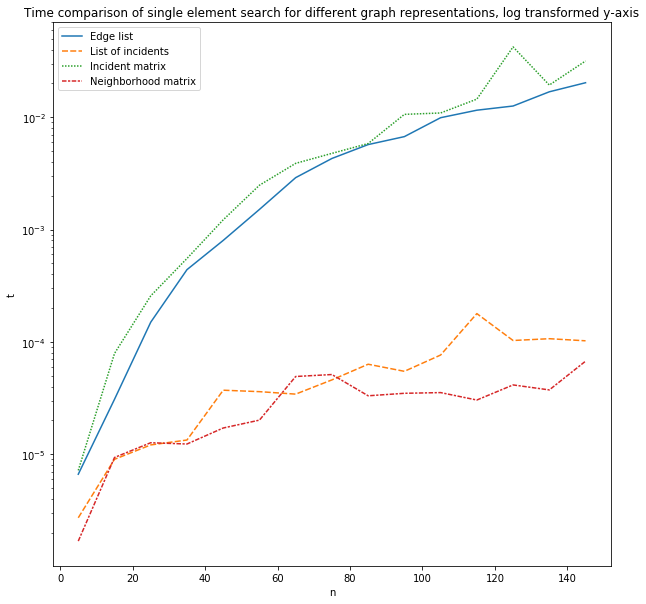

In [15]:
plt.figure(figsize=(10,10))
sns.lineplot(data=search_time)
plt.xlabel('n')
plt.ylabel('t')
plt.yscale('log')
plt.title('Time comparison of single element search for different graph representations, log transformed y-axis')
plt.show()

## 4. Topological sorting procedure

#### 4.1 DAG generator

In [16]:
def generate_dag(size):
    dag_tab = []
    while len(dag_tab) < (size*(size-1)/2)*0.3:
        random_first = random.randint(0, size-1)
        if random_first < size-1:
            random_second = random.randint(random_first+1, size-1)
            if [random_first, random_second] not in dag_tab:
                dag_tab.append([random_first, random_second])
    return dag_tab

#### 4.2 Storing DAGs in 4 different representations

In [17]:
sizes = list(np.arange(50,751, 50))
list_of_incidents_dag=dict()
neighborhood_matrix_dag = dict()
incident_matrix_dag = dict()
edge_list_dag = dict()

print('Done for: ')
for size in sizes:
    edge_list_dag[size] = generate_dag(size)
    list_of_incidents_dag[size] = list_of_incidents(True, size, edge_list_dag[size])
    neighborhood_matrix_dag[size] = neighborhood_matrix(True, size, edge_list_dag[size])
    incident_matrix_dag[size] = incident_matrix(True, size, edge_list_dag[size])
    print(size, end=', ')
    

Done for: 
50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 

#### 4.3 Topological Sort algorithm for list of incidents

In [50]:
def TopoSort_list_of_incidents(i, visited, sortedList, graph):
    visited[i] = True
    for j in graph[i]:
        if visited[j] == False:
            TopoSort_list_of_incidents(j, visited, sortedList, graph)
    sortedList.insert(0, i)

def TopologicalSort_list_of_incidents(size, graph):
    visited = [False for i in range(len(graph))]
    sortedGraph = []
    for i in range(len(graph)):
        if visited[i] == False:
            TopoSort_list_of_incidents(i, visited, sortedGraph, graph)
   

#### 4.4 Topological Sort for edge list

In [51]:
def TopoSort_edge_list(i, visited, sortedList, graph): 
    found = False                                      
    not_leaf=False                                     
    for j in graph:
        if j[0]==i:
            if visited[j[1]]==False:
                found=True
                TopoSort_edge_list(j[1], visited, sortedList, graph)

    if found==False:
        sortedList.insert(0,i)
        visited[i] = True
    if found==True and not_leaf==False:
        sortedList.insert(0,i)
        visited[i] = True

def TopologicalSort_edge_list(size, graph):
    visited = [False for i in range(size)]
    sortedGraph = []
    for i in range(size):
        if visited[i] == False:
            TopoSort_edge_list(i, visited, sortedGraph, graph)
    

#### 4.5 Topological Sort for neighborhood matrix

In [52]:
def TopoSort_neighborhood_matrix(i, visited, sortedList, graph):
    if 1 not in graph[i] and visited[i]==False:
        visited[i]=True
        sortedList.insert(0,i)
        TopoSort_neighborhood_matrix(i, visited, sortedList, graph)
    elif visited[i]==True:
        for j in range(len(graph)):
            if graph[j][i]==1 and visited[j]==False:
                visited[j]=True
                sortedList.insert(0,j)
                TopoSort_neighborhood_matrix(j, visited, sortedList, graph)       

def TopologicalSort_neighborhood_matrix(size, graph):
    visited = [False for i in range(len(graph))]
    sortedGraph = []
    for i in range(len(graph)):
        if visited[i] == False:
            TopoSort_neighborhood_matrix(i, visited, sortedGraph, graph)
    

#### 4.6 Topological Sort for incident matrix

In [53]:
def TopoSort_incident_matrix(i, visited, sortedList, graph):
    visited[i]=True
    row=[]
    
    for idx,col in enumerate(graph[i]):
        if col == -1:
            edge = list(graph[:, idx])
            row.append(edge.index(1))
    for j in row:
        if visited[j] == False:
            TopoSort_incident_matrix(j, visited, sortedList, graph)
    sortedList.insert(0,i)

def TopologicalSort_incident_matrix(size, graph):
    visited = [False for i in range(len(graph))]
    sortedGraph = []
    for i in range(len(graph)):
        if visited[i] == False:
            TopoSort_incident_matrix(i, visited, sortedGraph, graph)
    

#### 4.7 Time measuring of topological sort for all 4 representations

In [54]:
sizes = list(np.arange(50,751,50))
TopoSort_times=dict()

print('Done for: ')
for size in sizes:
    t = Timer(lambda: TopologicalSort_edge_list(size, edge_list_dag[size]))
    TopoSort_times[size] = [t.timeit(number = 10)/10]
    
    t = Timer(lambda: TopologicalSort_list_of_incidents(size, list_of_incidents_dag[size]))
    TopoSort_times[size].append(t.timeit(number = 10)/10)

    t = Timer(lambda: TopologicalSort_neighborhood_matrix(size, neighborhood_matrix_dag[size]))
    TopoSort_times[size].append(t.timeit(number = 10)/10)
    
    t = Timer(lambda: TopologicalSort_incident_matrix(size, np.array(incident_matrix_dag[size])))
    TopoSort_times[size].append(t.timeit(number = 10)/10)
    
    print(size, end=', ')

Done for: 
50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 

In [55]:
TopoSort_df = pd.DataFrame.from_dict(data=TopoSort_times, orient='index', \
                        columns=['Edge list', 'List of incidents', 'Neighborhood matrix', 'Incident matrix'])

In [56]:
TopoSort_df 

,Edge list,List of incidents,Neighborhood matrix,Incident matrix
50,0.001135,0.000031,0.000207,0.010603
100,0.005285,0.000083,0.000658,0.079629
150,0.019916,0.000164,0.001485,0.268844
200,0.042554,0.000259,0.002520,0.700033
250,0.081707,0.000404,0.004495,1.409152
300,0.237593,0.001299,0.011290,2.466107
350,0.253796,0.000783,0.007944,3.994951
400,0.412834,0.001170,0.012194,5.759825
450,0.526424,0.001317,0.013588,8.621401
500,0.662235,0.001604,0.016812,11.570798


#### 4.7 Topological Sort running times comparison

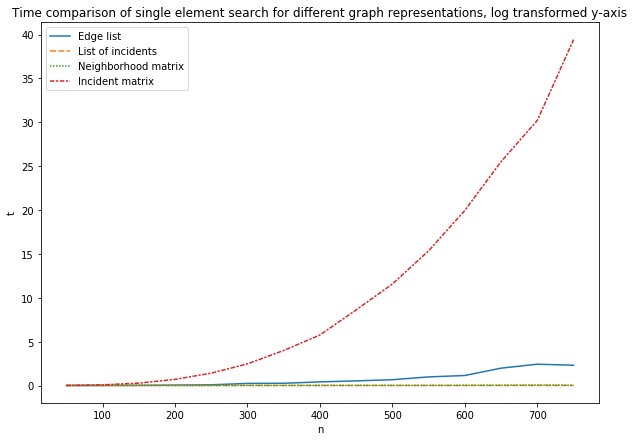

In [57]:
plt.figure(figsize=(10,7))
sns.lineplot(data=TopoSort_df)
plt.xlabel('n')
plt.ylabel('t')
#plt.yscale('log')
plt.title('Time comparison of single element search for different graph representations, log transformed y-axis')
plt.show()

## Conclusions on the effectiveness of each representation

Fastest methods of finding if there exists an edge are neighborhood (adjacency) matrix and list of incidents (adjacency list). Adjacency list is faster when looking for adjacent verticies - because it is as simple, as reading the list. Adjacency matrix demands going through entire row (time proportional to the number of verticies in graph). When it comes to testing if there exists an edge beween given pair of nodes, in adjacency matrix it can be done by checking if specific position in 2d matrix is 1 or 0 (in undirected, unweighted graphs) - time complexity O(constant time). In adjacency list it demands looking for the specific edge number in list of all edges of selected element of a given pair - time complexity O(number of edges)

Time complexity of edge list and incident matrix is comparable, but much worse than two, previously derscibed methods. Edgle list is just a simple matrix - searching through it coasts as much as looping through a simple list O(number of edges). Incident matrix at a first glance looks similar to adjacency matrix, but in fact it is relatively slow - we first select two elements of the matrix and then loop throug these elements to find 1 at the same position (for undirected, unwaighted graph). Time complexity is 0(number of edges)

I didin't wanted to choose one representation for Topological Search, that is why I used all 4 representations. As we can see List of incidents performs the best, Neighborhood matrix has quite similar performance. Taking into consideration both, the Topological Search speed and high performance in finding edges, if I were to choose one alogirthm, I would pick the list of incidents.Its construction is fairly understandable, easy to implement and has decent performance. Its performance are proven mathematically - it takes only O(number of verticies + number of edges) to represent graph; time complexity for checking adacency is O(V). The only remark of that representation is its time to remove vertex, because it needs time to find all adjacent verticies. According to Wikipedia, it is preferred to use list of incidents when representing graph with few edges (and in our case, the amount of edges is around 30%). For dense graphs (example with dense of 60%) neighborhood matrix is preferred